# Image Classification Challenge Dataset exploration

## Import libraties for image manipulation

In [ ]:
import sys
import os
from pathlib import Path
from typing import Tuple

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set_theme()

## Specify paths

In [ ]:
train_data_dir = "../data/train_data"
test_data_dir = "../data/test_data"
train_labels = "../data/train_labels.csv"

## Load labels with pandas

In [ ]:
df = pd.read_csv(train_labels)

In [ ]:
df.head()

,sample_index,label
0,img_0000.png,Triple negative
1,img_0001.png,Luminal A
2,img_0002.png,Luminal A
3,img_0003.png,Luminal B
4,img_0004.png,HER2(+)


In [ ]:
labels = list(df["label"].unique())
labels

['Triple negative', 'Luminal A', 'Luminal B', 'HER2(+)']

### Histogram about label distribution

<Axes: xlabel='label', ylabel='Count'>

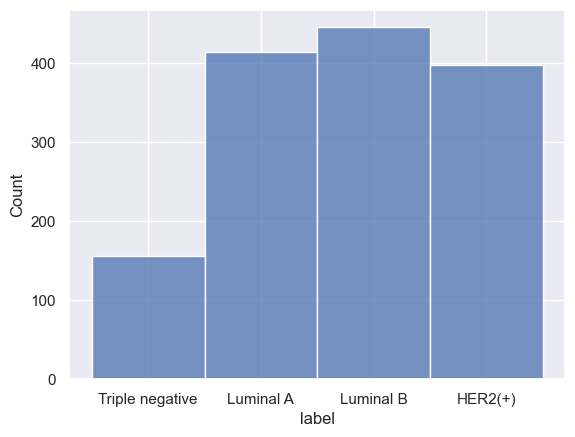

In [ ]:
sns.histplot(df["label"])

## Check image size

In [ ]:
def retrieve_imsize(p: str) -> Tuple[int, int, int]:
    im = cv2.imread(str(train_data_dir + "/" + p))
    if im is not None:
        return im.shape
    return 0, 0, 0


In [ ]:
df["imsize"] = df["sample_index"].apply(retrieve_imsize)

In [ ]:
df.sample(10)

,sample_index,label,imsize
1012,img_1012.png,HER2(+),"(1024, 1395, 3)"
428,img_0428.png,Triple negative,"(1024, 1739, 3)"
235,img_0235.png,Luminal A,"(1024, 1892, 3)"
95,img_0095.png,Luminal B,"(1063, 1024, 3)"
1003,img_1003.png,Luminal B,"(1311, 1024, 3)"
1233,img_1233.png,HER2(+),"(1024, 1340, 3)"
951,img_0951.png,Luminal B,"(1057, 1024, 3)"
409,img_0409.png,Triple negative,"(1024, 1269, 3)"
452,img_0452.png,Luminal B,"(1024, 1729, 3)"
636,img_0636.png,Triple negative,"(1895, 1024, 3)"


In [ ]:
def plot_samples(df: pd.DataFrame) -> None:
    n_samples = df.shape[0]
    if (n_samples % 5) != 0:
        raise ValueError(f"n_samples must be divisible by 5, got {n_samples}")
    n_rows = n_samples // 5
    n_cols = 5
    print(n_rows)
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5))
    impaths = df["sample_index"].to_list()
    im_lookup = {p: cv2.imread(str(train_data_dir + "/" + p)) for p in impaths}
    for i, (ax, impath) in enumerate(zip(axes.flat, impaths)):
        img = im_lookup[impath]
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.set_title(df.iloc[i]["label"], fontsize=8)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

4


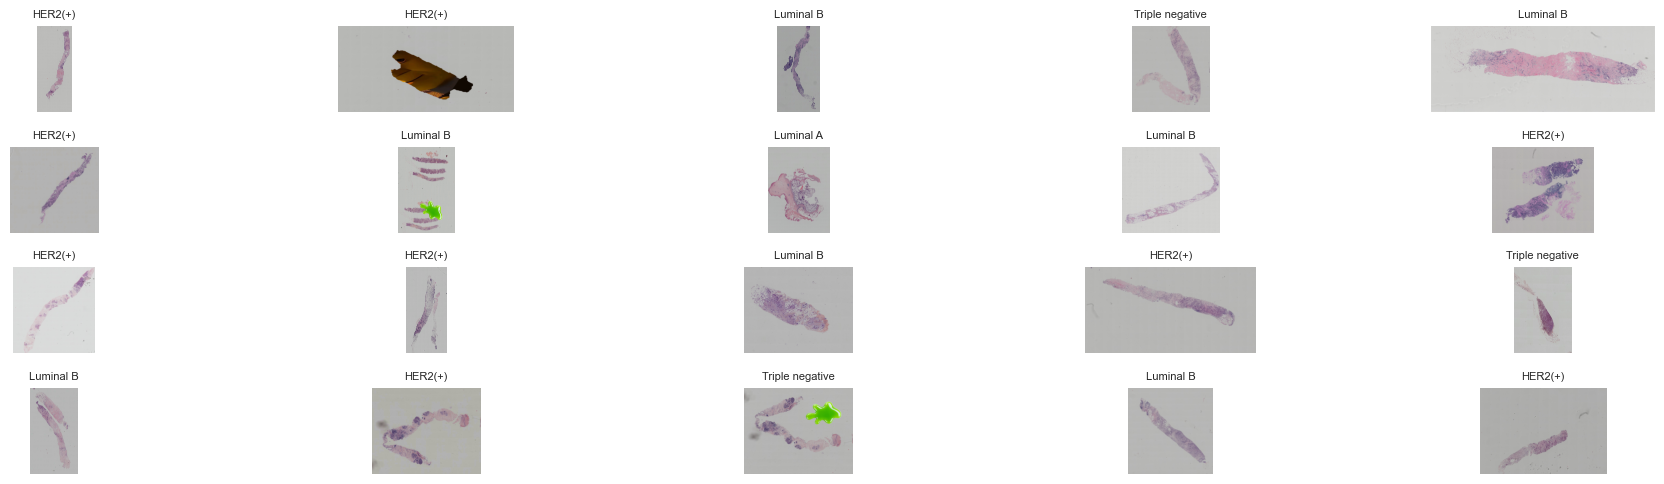

In [ ]:
plot_samples(df.sample(20))